Step 1 탐색적 분석 : UK Retail 데이터 분석하기

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/online_retail.csv", dtype = {"InvoiceNo":str, "CustomerID":str}, encoding = "ISO-8859-1")

df['InvoicdData'] = pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%Y %H:%M")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  object        
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
 8   InvoicdData  541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 37.2+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicdData
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00


In [2]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
InvoicdData         0
dtype: int64

In [3]:
df = df.dropna()
print(df.shape)

(406829, 9)


In [4]:
# 'Quantity' 양이 0 이하인 것 제거 : shape[0]
print(df[df['Quantity']<=0].shape[0])
df = df[df['Quantity']>0]

8905


In [5]:
# 'UnitPrice' 상품 가격 0 이하인 것 제거
print(df[df['UnitPrice']<=0].shape[0])
df = df[df['UnitPrice']>0]

40


In [6]:
# 'StockCode' 상품 코드가 일반적이지 않은 경우를 'ContainDigit'에 False로 저장 : any() T/F 판단
df['ContainDigit'] = df['StockCode'].apply(lambda x : any(c.isdigit() for c in x))
print(df[df['ContainDigit']==False].shape[0])
df[df['ContainDigit']==False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicdData,ContainDigit
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583,France,2010-12-01 08:45:00,False
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791,Netherlands,2010-12-01 11:27:00,False
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662,Germany,2010-12-01 13:04:00,False
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274,United Kingdom,2010-12-01 15:35:00,False
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274,United Kingdom,2010-12-01 15:35:00,False


In [7]:
# 상품 코드가 일반적이지 않은 경우 제거
df = df[df['ContainDigit']==True]

In [8]:
# dt.date : 날짜 처리법
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = df['InvoiceDate'].dt.date
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


<Axes: xlabel='date'>

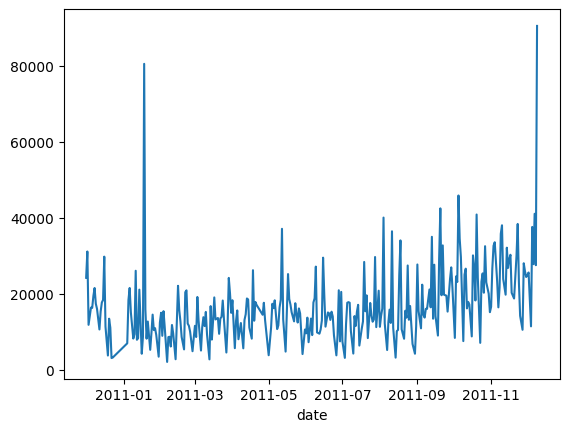

In [9]:
# 일자별 거래량 : 날짜에 대해 양 sum
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

<Axes: xlabel='date'>

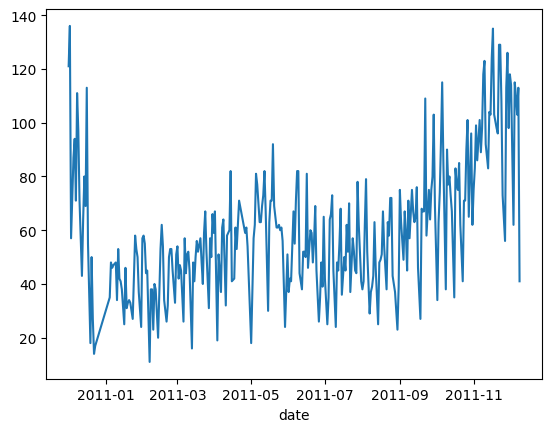

In [10]:
# 일자별 거래 횟수 : 날짜에 대해 ID nunique 세기
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series.plot()

<Axes: xlabel='date'>

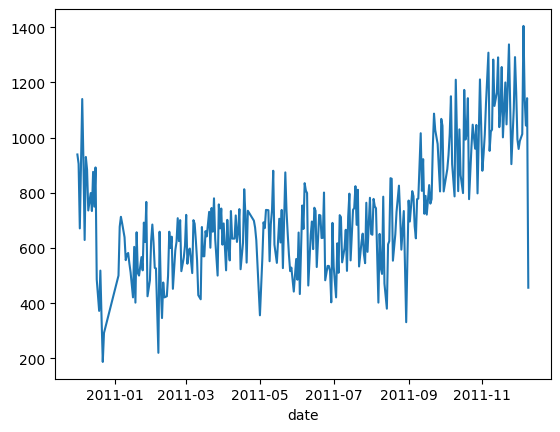

In [11]:
# 일자별 거래 상품 개수 : 
date_unique_item_series = df.groupby('date')['StockCode'].nunique()
date_unique_item_series.plot()

In [12]:
# 총 유저의 수
print(len(df['CustomerID'].unique()))

4334


In [13]:
# 유저별 거래 횟수의 통계치
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

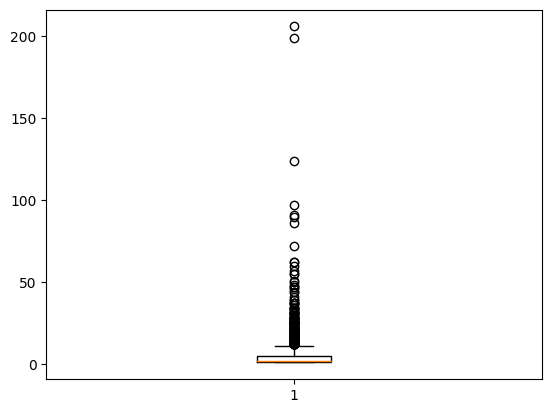

In [14]:
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [15]:
# 유저별로 구매한 상품의 통계치
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

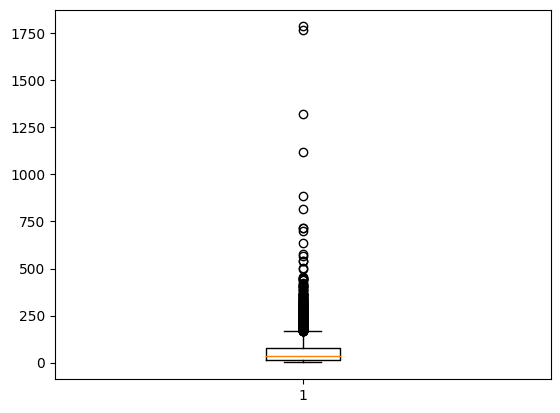

In [16]:
plt.boxplot(customer_unique_item_series.values)
plt.show()

미니 퀴즈 5-2 : 유저가 아닌 상품을 기준으로 
- ① 총 상품 개수
- ② 가장 거래가 많은 상품 Top10
- ③ 상품별 판매수량 분포 탐색
- ④ 거래별 가격 탐색

In [17]:
# 총 상품 갯수
print(len(df['StockCode'].unique()))

3660


In [18]:
# 가장 거래가 많은 상품 Top10 : nunique() !!
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=True).head(10)

StockCode
44242A    1
90100     1
90102     1
90104     1
90118     1
21895     1
90122B    1
84613C    1
84614A    1
35607A    1
Name: InvoiceNo, dtype: int64

count     3660.000000
mean      1409.149727
std       3513.654056
min          1.000000
25%         65.000000
50%        395.000000
75%       1417.500000
max      80995.000000
Name: Quantity, dtype: float64


<Axes: xlabel='StockCode'>

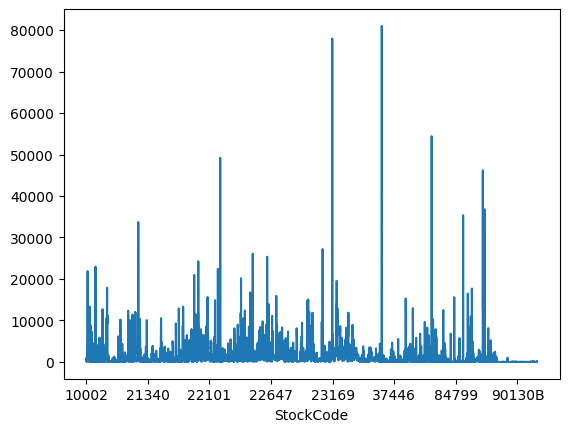

In [19]:
# 상품별 거래 수량 탐색
print(df.groupby('StockCode')['Quantity'].sum().describe())
stock_unique_quantity = df.groupby('StockCode')['Quantity'].sum()
stock_unique_quantity.plot()

<Axes: xlabel='StockCode'>

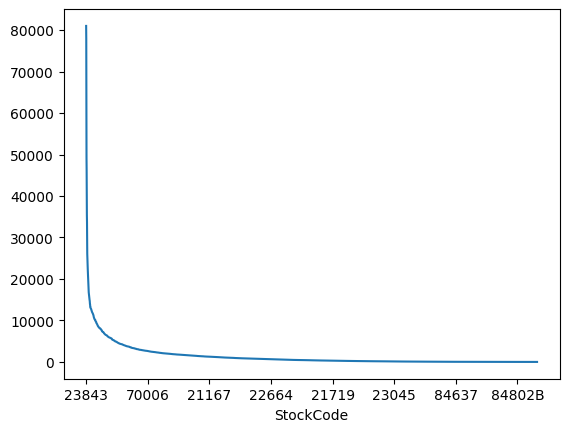

In [20]:
# 분포 확인
stock_unique_quantity.sort_values(ascending=False).plot() # 내림차순

In [21]:
# 거래별 가격 탐색 : quantity * unitprice
df['amount'] = df['UnitPrice'] * df['Quantity']
amount_unique_ID = df.groupby('InvoiceNo')['amount'].sum()
amount_unique_ID.describe()

count     18405.000000
mean        476.378845
std        1678.749892
min           0.380000
25%         157.900000
50%         302.360000
75%         465.700000
max      168469.600000
Name: amount, dtype: float64

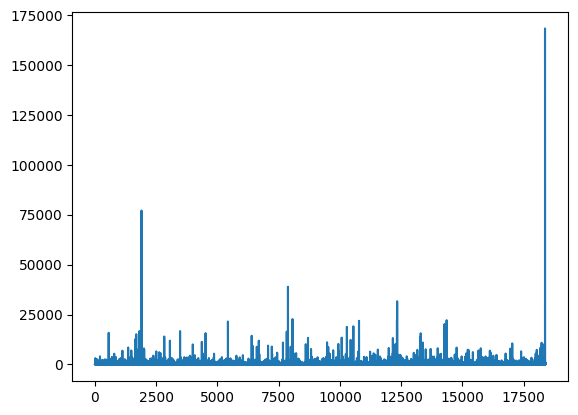

In [22]:
plt.plot(amount_unique_ID.values)
plt.show()

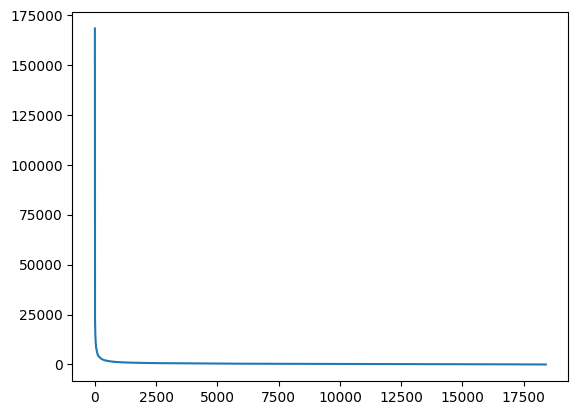

In [23]:
plt.plot(amount_unique_ID.sort_values(ascending=False).values)  # .values : 범위 숫자로 표현
plt.show()

In [24]:
# 2011-11-1 기준 이전과 이후로 데이터 분리
import datetime

df_year_round = df[df['date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]
print(df_year_round.shape)
print(df_year_end.shape)

(314902, 12)
(81568, 12)


In [25]:
# 11월 이전 유저별 구매 상품 집합 추출
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
customer_item_round_set

CustomerID
12346                                              {23166}
12347    {47580, 22726, 17021, 47567B, 84992, 22212, 22...
12348    {22952, 21982, 21983, 21211, 84992, 22951, 224...
12350    {22412, 22620, 21171, 79066K, 79191C, 21915, 2...
12352    {22646, 22780, 23298, 22550, 22634, 21314, 221...
                               ...                        
18280    {22499, 22467, 22725, 22495, 22727, 22611, 223...
18281    {23209, 22467, 23008, 22716, 22037, 22028, 23007}
18282    {21270, 23187, 22424, 23295, 22089, 21108, 21109}
18283    {47580, 21826, 21240, 22149, 22385, 22150, 225...
18287    {84507C, 72351B, 47422, 22065, 22755, 20961, 2...
Name: StockCode, Length: 3970, dtype: object

In [26]:
customer_item_dict = {}

for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'
        
print(str(customer_item_dict)[:100]+" ...")

{'12346': {'23166': 'old'}, '12347': {'47580': 'old', '22726': 'old', '17021': 'old', '47567B': 'old ...


In [27]:
# 11월 이후 유저별 구매 상품 집합 
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
customer_item_end_set

CustomerID
12347    {23084, 23508, 20719, 21265, 21064, 23506, 235...
12349    {35970, 23113, 20685, 22601, 22059, 23439, 229...
12352    {23088, 23368, 23089, 23367, 22178, 22978, 226...
12356                                       {21843, 22423}
12357    {37449, 22714, 21555, 22027, 22333, 22726, 215...
                               ...                        
18272    {23113, 22960, 23240, 22074, 22969, 23495, 234...
18273                                             {79302M}
18274    {84509A, 23245, 22423, 22720, 21108, 21231, 22...
18282                  {23174, 22818, 22699, 23175, 22423}
18283    {35970, 22385, 22551, 84992, 23351, 20726, 850...
Name: StockCode, Length: 1904, dtype: object

In [28]:
for customer_id, stocks in customer_item_end_set.items():
    if customer_id in customer_item_dict:
        for stock_code in stocks:
            # 구매한 적 있는 상품인지 체크
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            else:
                customer_item_dict[customer_id][stock_code] = 'new'
    else:
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'
                
print(str(customer_item_dict)[:300] + ' ...')

{'12346': {'23166': 'old'}, '12347': {'47580': 'old', '22726': 'old', '17021': 'old', '47567B': 'old', '84992': 'old', '22212': 'old', '22697': 'old', '20719': 'both', '23175': 'old', '22727': 'old', '21731': 'both', '47559B': 'old', '23076': 'old', '22771': 'old', '23084': 'both', '21064': 'both',  ...


In [29]:
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)

for customer_id, stocks in customer_item_dict.items():
    
    val = [val for val in stocks.values()]
    old, new, both = val.count('old'), val.count('new'), val.count('both')
    
    row = [customer_id, old, new, both]
    series = pd.Series(row, index = columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

df_order_info.head(5)

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [30]:
# 전체 유저 수
print(df_order_info.shape[0])

# old 1 이상, new가 1 이상
# 11월 이전에 구매 이력 있으며, 11월 이후에 새로운 상품을 구매한 유저
print(df_order_info[ (df_order_info['old'] >= 1) & (df_order_info['new'] >= 1)].shape[0])

# both 1 이상
# 재구매한 상품이 있는 유저
print(df_order_info[df_order_info['both'] >= 1].shape[0])

4334
1446
1426


In [31]:
# 신규 구매한 사람들은 얼마나 많은 종류의 상품을 구매했는지
print(df_order_info['new'].value_counts()[1:].describe())

count    132.000000
mean      13.734848
std       19.130672
min        1.000000
25%        1.000000
50%        5.000000
75%       16.000000
max       81.000000
Name: new, dtype: float64


Step 2 예측 분석 : SVD를 활용한 상품 구매 예측하기

In [32]:
# 추천 대상이 되는 유저와 상품 개수 출력
print(df_year_round['CustomerID'].nunique())
print(df_year_round['StockCode'].nunique())

3970
3608


In [33]:
# SVD 모델에 사용할 Rating 탐색하기
uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df.head()

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3


<Axes: >

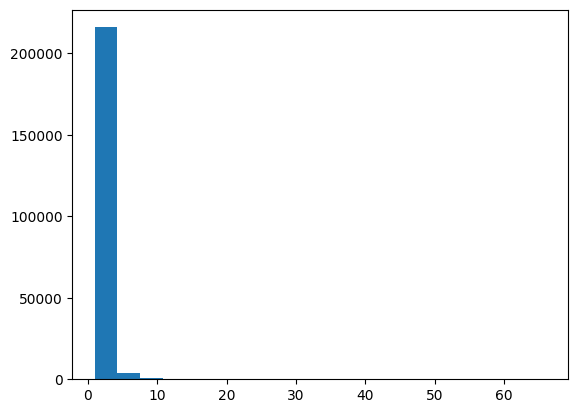

In [34]:
uir_df['InvoiceNo'].hist(bins=20, grid=False)

<Axes: >

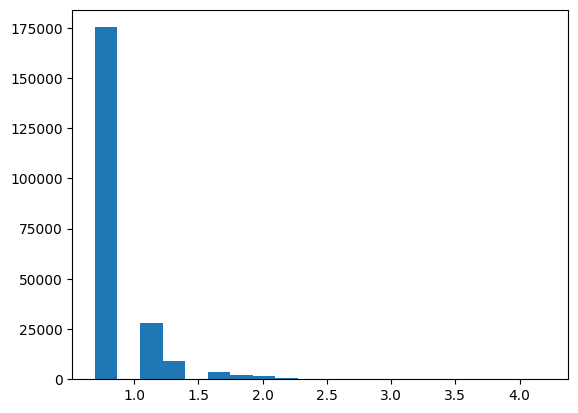

In [35]:
# Rating(InvoiceNo) 피처를 log normalization 해준 뒤, 다시 분포 탐색 : np.log10(x)+1 대신 np.log1p(x)
uir_df['InvoiceNo'].apply(lambda x: np.log1p(x)).hist(bins=20, grid=False)

<Axes: >

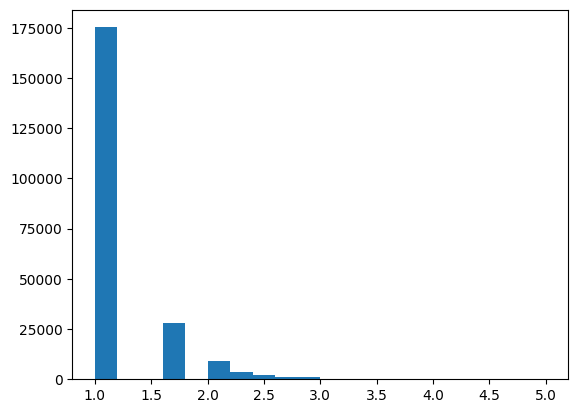

In [36]:
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x : np.log10(x)+1)

# min-max scaling
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) 
                    / (uir_df['Rating'].max() - uir_df['Rating'].min()) *4 +1)

uir_df['Rating'].hist(bins=20, grid=False)

In [37]:
# SVD 모델 학습을 위한 데이터셋 생성
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
uir_df.head()

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881


In [38]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df, reader)
train, test = train_test_split(data, test_size=0.2) # 8:2

# SVD 모델 학습
train_start = time.time()
model = SVD(n_factors=8,
            lr_all = 0.005,
            reg_all = 0.02, 
            n_epochs = 200)
model.fit(train)
train_end = time.time()
print("training time of model : %.2f seconds" % (train_end - train_start))

predictions = model.test(test)

# 테스트 데이터의 RMSE 출력
print("RMSE of test dataset in SVD model : ", accuracy.rmse(predictions))

training time of model : 10.56 seconds
RMSE: 0.3366
RMSE of test dataset in SVD model :  0.33656830477690935


In [39]:
# SVD를 사용하기 위한 11월 이전 전체 full train set 학습 데이터 생성
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df, reader)
train_full = data.build_full_trainset()

# SVD 모델 학습
train_full_start = time.time()
model = SVD(n_factors=8,
            lr_all = 0.005,
            reg_all = 0.02, 
            n_epochs = 200)
model.fit(train_full)
train_full_end = time.time()
print("training time of model by full data : %.2f seconds" % (train_full_end - train_full_start))

training time of model by full data : 6.44 seconds


Step 3 예측 평가 : 상품 추천 시뮬레이션하기

In [40]:
# 이전에 구매하지 않았던 상품을 예측 대상으로 선정
test_data = train_full.build_anti_testset()
target_user_predictions = model.test(test_data)

target_user_predictions

[Prediction(uid='12346', iid='16008', r_ui=1.189098167280817, est=1, details={'was_impossible': False}),
 Prediction(uid='12346', iid='17021', r_ui=1.189098167280817, est=1.1480039183927793, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20665', r_ui=1.189098167280817, est=1.013918145373158, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20719', r_ui=1.189098167280817, est=1.2606484630394197, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20780', r_ui=1.189098167280817, est=1, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20782', r_ui=1.189098167280817, est=1.1198485373366962, details={'was_impossible': False}),
 Prediction(uid='12346', iid='20966', r_ui=1.189098167280817, est=1.0629061425053112, details={'was_impossible': False}),
 Prediction(uid='12346', iid='21035', r_ui=1.189098167280817, est=1.0839879627556808, details={'was_impossible': False}),
 Prediction(uid='12346', iid='21041', r_ui=1.18909816728081

In [41]:
# Prediction(uid='12346', iid='16008', r_ui=1.1897285934348203, est=1.0100629105204517, details={'was_impossible': False})

# 구매 예측 결과를 딕셔너리 형태로 변환 함수: {customer_id : {stock_code : 'rating'}, ...}
def to_dictionary(target_user_predictions):
    order_prediction_dict = {}
    for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
        if customer_id in order_prediction_dict:
            if stock_code in order_prediction_dict[customer_id]:
                pass
            else:
                order_prediction_dict[customer_id][stock_code] = predicted_rating
        else:
            order_prediction_dict[customer_id] = {}
            order_prediction_dict[customer_id][stock_code] = predicted_rating
    
    return order_prediction_dict

In [42]:
# 구매 예측 결과를 딕셔너리 형태로 반환
new_order_prediction_dict = to_dictionary(target_user_predictions)
print(str(new_order_prediction_dict)[:300] + " ...")

{'12346': {'16008': 1, '17021': 1.1480039183927793, '20665': 1.013918145373158, '20719': 1.2606484630394197, '20780': 1, '20782': 1.1198485373366962, '20966': 1.0629061425053112, '21035': 1.0839879627556808, '21041': 1.0606593894393839, '21064': 1.0918252715044698, '21154': 1.0874461914563753, '2117 ...


In [43]:
# 이전에 구매했었던 상품을 예측의 대상으로 선정
test_data = train_full.build_testset()
target_user_predictions_re = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 반환
re_order_prediction_dict = to_dictionary(target_user_predictions_re)
print(str(re_order_prediction_dict)[:300] + " ...")

{'12346': {'23166': 1.048338342022168}, '12347': {'16008': 1.2174034540045295, '17021': 1.1413152516483052, '20665': 1.1706892051482662, '20719': 1.712980338411414, '20780': 1.0828037851622236, '20782': 1.1787987509829254, '20966': 1.2330309785997153, '21035': 1.3422153737476596, '21041': 1.31103351 ...


In [44]:
# 모든 유저와 모든 상품 간의 예측 점수 합치기 : 두 딕셔너리 하나로 통합
total_prediction_dict ={}

def converge_dict(order_prediction_dict, total_prediction_dict):
    for customer_id in order_prediction_dict:
        # customer_id key값이 없다면 생성
        if customer_id not in total_prediction_dict:
            total_prediction_dict[customer_id] = {}
        # customer_id value값이 없다면 생성
        for stock_code, predicted_rating in order_prediction_dict[customer_id].items():
            if stock_code not in total_prediction_dict[customer_id]:
                total_prediction_dict[customer_id][stock_code] = predicted_rating
    return total_prediction_dict

total_order_prediction_dict = converge_dict(re_order_prediction_dict, converge_dict(new_order_prediction_dict, total_prediction_dict))

print(str(total_order_prediction_dict)[:300] + " ...")

{'12346': {'16008': 1, '17021': 1.1480039183927793, '20665': 1.013918145373158, '20719': 1.2606484630394197, '20780': 1, '20782': 1.1198485373366962, '20966': 1.0629061425053112, '21035': 1.0839879627556808, '21041': 1.0606593894393839, '21064': 1.0918252715044698, '21154': 1.0874461914563753, '2117 ...


In [45]:
# 11월 이후의 데이터를 테스트 데이터셋으로 사용
simulation_test_df = df_year_end.groupby('CustomerID')['StockCode'].apply(set).reset_index()
simulation_test_df.columns = ['CustomerID', 'RealOrdered']
simulation_test_df.head()

,CustomerID,RealOrdered
0,12347,"{23084, 23508, 20719, 21265, 21064, 23506, 235..."
1,12349,"{35970, 23113, 20685, 22601, 22059, 23439, 229..."
2,12352,"{23088, 23368, 23089, 23367, 22178, 22978, 226..."
3,12356,"{21843, 22423}"
4,12357,"{37449, 22714, 21555, 22027, 22333, 22726, 215..."


In [46]:
# 시뮬레이션 결과 추출
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        # {stock_code : Rating}
        predicted_stock_dict = prediction_dict[customer_id]
        # 예측된 상품의 Rating이 높은 순으로 정렬
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x: predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None       

In [47]:
# 상품 추천 시뮬레이션 결과 추출
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['CustomerID'].apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['CustomerID'].apply(lambda x: add_predicted_stock_set(x, re_order_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['CustomerID'].apply(lambda x: add_predicted_stock_set(x, total_order_prediction_dict))

simulation_test_df.head()

,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,12347,"{23084, 23508, 20719, 21265, 21064, 23506, 235...","[22197, 20723, 22848, 22616, 23301, 47566, 209...","[21731, 22726, 22728, 21975, 22727, 22371, 227...","[21731, 22197, 22726, 20723, 22728, 22848, 226..."
1,12349,"{35970, 23113, 20685, 22601, 22059, 23439, 229...",None,None,None
2,12352,"{23088, 23368, 23089, 23367, 22178, 22978, 226...","[84086B, 90119, 85131B, 21655, 90042A, 72709, ...","[22423, 22779, 22617, 22701, 22780, 22138, 227...","[84086B, 90119, 85131B, 21655, 90042A, 72709, ..."
3,12356,"{21843, 22423}","[84086B, 90119, 85131B, 90042A, 90035A, 85099B...","[22423, 22649, 22131, 84380, 22699, 21843, 210...","[84086B, 90119, 85131B, 90042A, 90035A, 85099B..."
4,12357,"{37449, 22714, 21555, 22027, 22333, 22726, 215...",None,None,None


In [48]:
# 상품 추천 평가 기준 정의 : 구매 예측한 k개의 recall(재현율)을 평가 기준으로 정의
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상이 없다면, 11월 이후에 상품을 처음 구매하는 유저임
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품 '구매할 것으로 예측'
    predicted = predicted_order[:k]
    true_positive = 0
    # 구매할 것으로 예측한 stock_code 중
    for stock_code in predicted:
        # 실제 order에 들어 있는 stock_code
        if stock_code in real_order:
            true_positive += 1
    
    recall = true_positive / len(predicted)
    return recall

In [49]:
# 시뮬레이션 대상 유저에게 상품 추천해준 결과 평가
simulation_test_df['top_k_recall(New)'] = simulation_test_df.apply(lambda x: calculate_recall(x['RealOrdered'], x['PredictedOrder(New)'], 5), axis=1)
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df.apply(lambda x: calculate_recall(x['RealOrdered'], x['PredictedOrder(Reorder)'], 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df.apply(lambda x: calculate_recall(x['RealOrdered'], x['PredictedOrder(Total)'], 5), axis=1)

In [51]:
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Reorder)'].mean()) # 가장 예측 확률 높음
print(simulation_test_df['top_k_recall(Total)'].mean())

0.007402597402597403
0.31464285714285717
0.07090909090909091


In [52]:
# 평가 결과 점수 기준 살펴보기 : 재구매 기준
simulation_test_df['top_k_recall(Reorder)'].value_counts()

0.000000    462
0.200000    390
0.400000    292
0.600000    178
0.800000    124
1.000000     75
0.500000      7
0.250000      6
0.666667      4
0.750000      1
0.333333      1
Name: top_k_recall(Reorder), dtype: int64

In [53]:
# 평가 결과 점수 기준 살펴보기 : 구매하지 않은 사람들 기준
simulation_test_df['top_k_recall(New)'].value_counts()

0.0    1488
0.2      49
0.4       2
0.8       1
Name: top_k_recall(New), dtype: int64

In [54]:
# 평가 결과 점수 기준 살펴보기 : 모든 사람들 기준
simulation_test_df['top_k_recall(Total)'].value_counts()

0.0    1219
0.2     186
0.4      77
0.6      33
0.8      18
1.0       7
Name: top_k_recall(Total), dtype: int64

In [55]:
# 시뮬레이션 최종 결과 정리
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].apply(lambda x: x[:k])  # top 5
result_df = result_df[['CustomerID', 'RealOrdered', 'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]
result_df.columns = [['구매자ID', '실제주문', '5개 추천결과', 'Top5 추천_주문제한도']]
result_df.sample(5).head()

,구매자ID,실제주문,5개 추천결과,Top5 추천_주문제한도
1025,15532,"{22059, 16235, 22835, 22483, 21428, 21107, 233...","[84912B, 17012D, 72800C, 22834, 17012F]",0.0
1886,18223,"{21137, 21181, 22726, 82600, 23497, 23493, 233...","[85152, 47566, 20914, 21181, 22659]",0.2
267,13117,"{22153, 23058, 22579, 21793, 22457, 35953, 206...","[47566, 84945, 21128, 84879, 71459]",0.0
1056,15615,"{23129, 23681, 22411, 22945, 22841, 23355, 233...","[85099B, 22386, 47566, 85099C, 21931]",1.0
1363,16668,"{21790, 23280, 22536}","[21790, 23280, 21260, 23282, 85053]",0.4
